<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/ReLU_in_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Sigmoid and Tanh

In [3]:
def sigmoid(x):
  return 1.0/(1.0+ np.exp(-x))

In [4]:
sigmoid(10)

0.9999546021312976

In [5]:
x = np.linspace(-7,7,200)

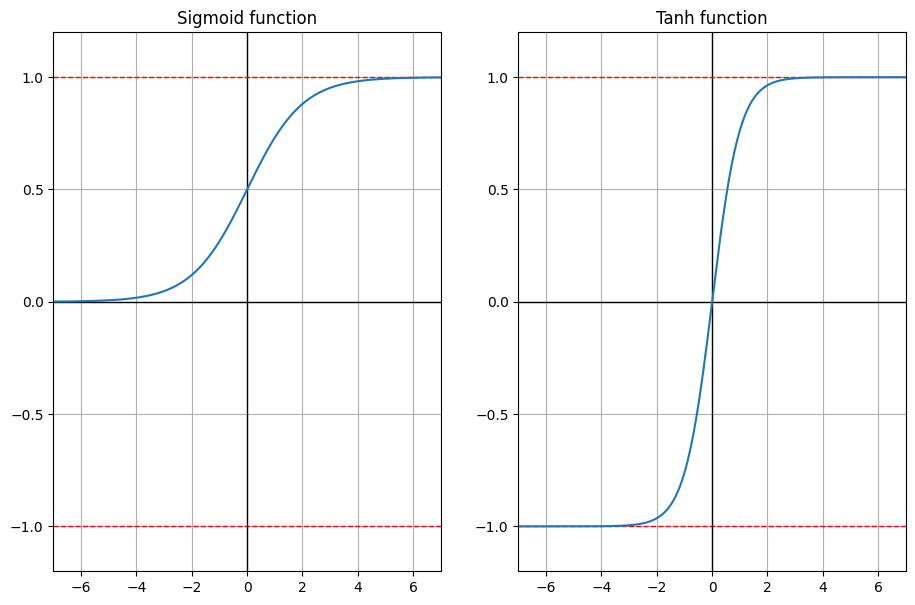

In [6]:
plt.figure(figsize = (11,7))

plt.subplot(1,2,1)
# coordinate 
plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
plt.plot([-7, 7], [-1, -1], 'r--', linewidth=1)
plt.plot([0, 0], [-2.2, 3.2], 'k-', linewidth=1)
plt.plot([-7,7], [1,1], 'r--', linewidth=1)

plt.plot(x, sigmoid(x))
plt.grid(True)
plt.axis([-7,7,-1.2,1.2])
plt.title("Sigmoid function")

plt.subplot(1,2,2)

# coordinate 
plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
plt.plot([-7, 7], [-1, -1], 'r--', linewidth=1)
plt.plot([0, 0], [-2.2, 3.2], 'k-', linewidth=1)
plt.plot([-7,7], [1,1], 'r--', linewidth=1)

plt.title("Tanh function")
plt.plot(x, np.tanh(x))
plt.axis([-7,7,-1.2,1.2])
plt.grid(True)
plt.show()


## Derivate of functions

In [7]:
def dev_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

In [8]:
def dev_tanh(x):
  return 1- np.tanh(x)**2

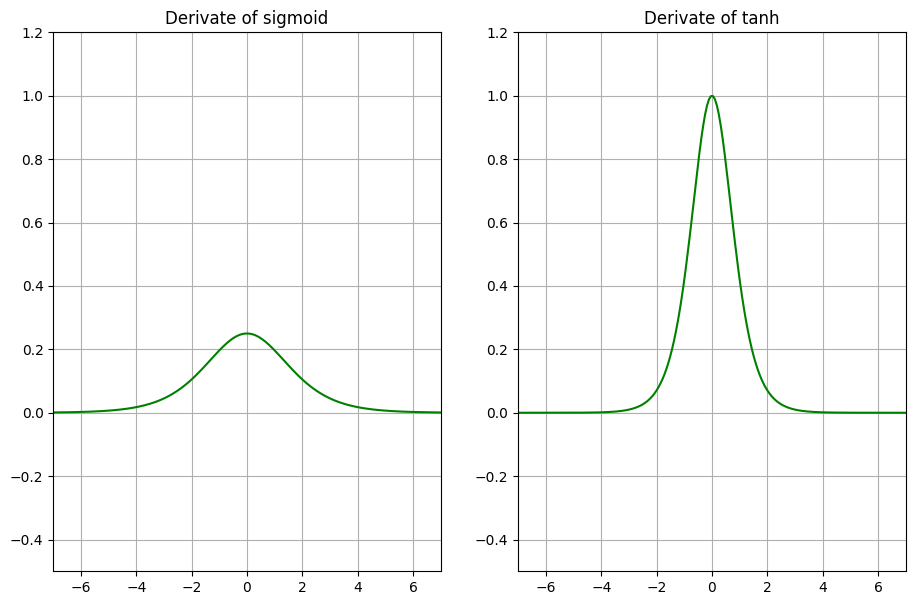

In [9]:
plt.figure(figsize = (11,7))


plt.subplot(1,2,1)
plt.plot(x, dev_sigmoid(x),'-g')
plt.title("Derivate of sigmoid")
plt.axis([-7, 7, -0.5, 1.2])
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x, dev_tanh(x),'-g')
plt.title("Derivate of tanh")
plt.axis([-7, 7, -0.5, 1.2])
plt.grid(True)
plt.show()

##Fashion MMIST dataset

In [10]:
(x_train, y_train),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [11]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

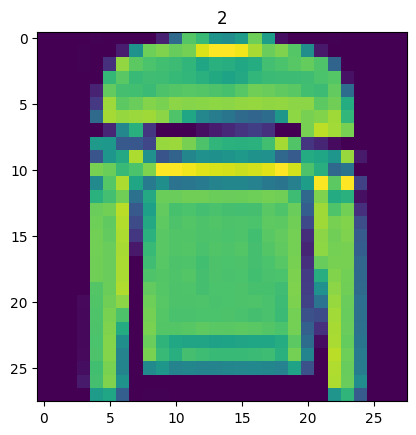

In [12]:
plt.imshow(x_train[5])
plt.title(y_train[5])
plt.show()

In [13]:
import pandas as pd
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [14]:
x_train[1].max(), x_train[1].min()

(255, 0)

### Training a deep NN with ReLU
Let's first build a deep NN with ReLU and default kernel_initializer

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
60000*0.2

12000.0

In [17]:
x_val = x_train[:1000]
y_val = y_train[:1000]

x_train = x_train[1000:]
y_train = y_train[1000:]

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((59000, 28, 28), (59000,), (1000, 28, 28), (1000,))

In [18]:
from tensorflow.keras.layers import Flatten, Dense

def create_model(activation = None):
  model = tf.keras.Sequential()
  model.add(Flatten(input_shape = [28,28]))
  model.add(Dense(300, activation = activation))
  for i in range(49):
    model.add(Dense(100, activation = activation))
  model.add(Dense(10, activation = 'softmax'))
  model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model

In [25]:
def plot_metric(history, metric):
  metric_values = history.history[metric]
  epochs = range(1, len(metric_values)+1)
  plt.plot(epochs, metric_values, label = metric)
  val_metric_values = history.history['val_'+metric]
  plt.plot(epochs, val_metric_values, label='val_'+metric)
  plt.legend()
  plt.xlabel("Epoch")
  plt.ylabel(metric)
  plt.title("Train and validation metric")
  plt.show()

In [ ]:
#model.summary()

In [20]:
model_relu = create_model(activation = 'relu')

In [21]:
history_relu = model_relu.fit(x_train, y_train, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
1844/1844 [==============================] - 36s 14ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.0950
Epoch 2/10
1844/1844 [==============================] - 26s 14ms/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3029 - val_accuracy: 0.0860
Epoch 3/10
1844/1844 [==============================] - 25s 13ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1020
Epoch 4/10
1844/1844 [==============================] - 25s 14ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1844/1844 [==============================] - 35s 19ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.0860
Epoch 6/10
1844/1844 [==============================] - 33s 18ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3027 - val_accuracy: 0.0860
Epoch 7/10
1844/1844 [==============================] - 32s 17ms/step - loss: 2.3027 - accuracy: 0.0963 - val_loss: 2.3026 -

In [22]:
model_relu.evaluate(x_val, y_val)

32/32 [==============================] - 0s 6ms/step - loss: 2.3027 - accuracy: 0.0950


[2.3027427196502686, 0.0949999988079071]

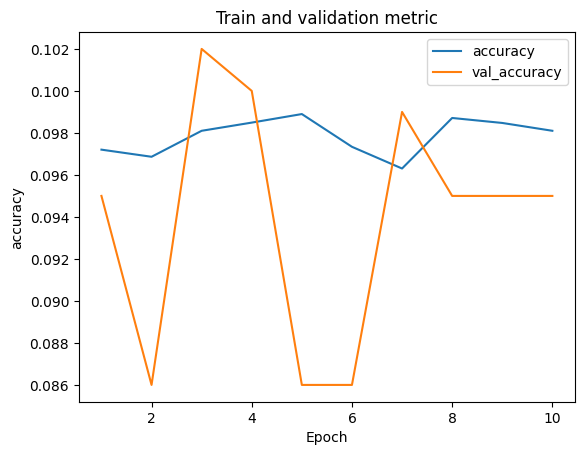

In [26]:
plot_metric(history_relu, 'accuracy')

###2. Train with He initialization and a smaller learning rate


In [36]:
tf.random.set_seed(42)
np.random.seed(42)

def create_model(activation, k_init):
  model = tf.keras.Sequential()
  model.add(Flatten(input_shape = [28,28]))
  model.add(Dense(300, activation = activation, kernel_initializer = k_init))
  for _ in range(49):
    model.add(Dense(100, activation = activation, kernel_initializer = k_init))
  model.add(Dense(10, activation = 'softmax'))
  model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model

In [37]:
model_relu_he = create_model(activation = 'relu', k_init = 'he_normal')

In [38]:
history_relu_he = model_relu_he.fit(x_train, y_train, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
1844/1844 [==============================] - 30s 13ms/step - loss: 1.2281 - accuracy: 0.5312 - val_loss: 0.7661 - val_accuracy: 0.7230
Epoch 2/10
1844/1844 [==============================] - 23s 13ms/step - loss: 0.6812 - accuracy: 0.7441 - val_loss: 0.7407 - val_accuracy: 0.7400
Epoch 3/10
1844/1844 [==============================] - 23s 13ms/step - loss: 0.5833 - accuracy: 0.7861 - val_loss: 0.5150 - val_accuracy: 0.8220
Epoch 4/10
1844/1844 [==============================] - 23s 13ms/step - loss: 0.5304 - accuracy: 0.8117 - val_loss: 0.5098 - val_accuracy: 0.8350
Epoch 5/10
1844/1844 [==============================] - 23s 13ms/step - loss: 0.4892 - accuracy: 0.8280 - val_loss: 0.4839 - val_accuracy: 0.8350
Epoch 6/10
1844/1844 [==============================] - 23s 12ms/step - loss: 0.4598 - accuracy: 0.8369 - val_loss: 0.4291 - val_accuracy: 0.8530
Epoch 7/10
1844/1844 [==============================] - 23s 13ms/step - loss: 0.4364 - accuracy: 0.8468 - val_loss: 0.4569 -

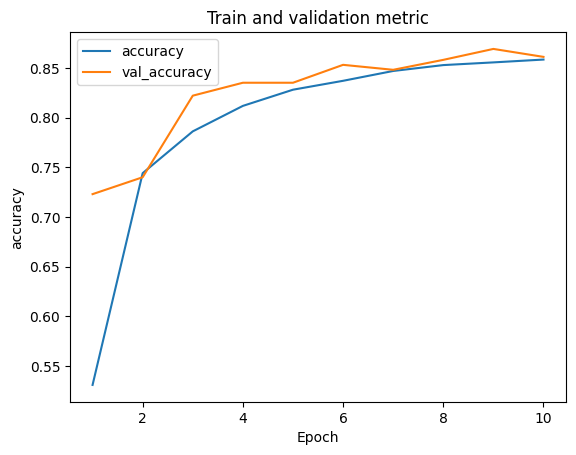

In [39]:
plot_metric(history_relu_he, 'accuracy')

In [41]:
def create_model_1(activation = None):
  model = tf.keras.Sequential()
  model.add(Flatten(input_shape = [28,28]))
  model.add(Dense(300, activation = activation))
  for i in range(49):
    model.add(Dense(100, activation = activation))
  model.add(Dense(10, activation = 'softmax'))
  model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model

In [42]:
model_tanh =create_model_1(activation = 'tanh')
history_tanh = model_tanh.fit(x_train, y_train, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
1844/1844 [==============================] - 33s 14ms/step - loss: 1.4063 - accuracy: 0.4734 - val_loss: 0.9664 - val_accuracy: 0.7050
Epoch 2/10
1844/1844 [==============================] - 33s 18ms/step - loss: 0.7947 - accuracy: 0.7552 - val_loss: 0.6568 - val_accuracy: 0.8040
Epoch 3/10
1844/1844 [==============================] - 25s 13ms/step - loss: 0.6039 - accuracy: 0.8038 - val_loss: 0.5509 - val_accuracy: 0.8370
Epoch 4/10
1844/1844 [==============================] - 26s 14ms/step - loss: 0.5309 - accuracy: 0.8224 - val_loss: 0.5272 - val_accuracy: 0.8280
Epoch 5/10
1844/1844 [==============================] - 25s 13ms/step - loss: 0.4915 - accuracy: 0.8345 - val_loss: 0.4989 - val_accuracy: 0.8460
Epoch 6/10
1844/1844 [==============================] - 24s 13ms/step - loss: 0.4644 - accuracy: 0.8412 - val_loss: 0.4572 - val_accuracy: 0.8430
Epoch 7/10
1844/1844 [==============================] - 24s 13ms/step - loss: 0.4439 - accuracy: 0.8478 - val_loss: 0.4274 -

In [43]:
model_sigmoid =create_model_1(activation = 'sigmoid')
history_sigmoid = model_sigmoid.fit(x_train, y_train, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
1844/1844 [==============================] - 32s 14ms/step - loss: 2.3427 - accuracy: 0.1011 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
1844/1844 [==============================] - 27s 14ms/step - loss: 2.3029 - accuracy: 0.1001 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 3/10
1844/1844 [==============================] - 27s 14ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3031 - val_accuracy: 0.1040
Epoch 4/10
1844/1844 [==============================] - 26s 14ms/step - loss: 2.3029 - accuracy: 0.0982 - val_loss: 2.3030 - val_accuracy: 0.0920
Epoch 5/10
1844/1844 [==============================] - 26s 14ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/10
1844/1844 [==============================] - 25s 14ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3025 - val_accuracy: 0.1040
Epoch 7/10
1844/1844 [==============================] - 26s 14ms/step - loss: 2.3029 - accuracy: 0.1001 - val_loss: 2.3027 -

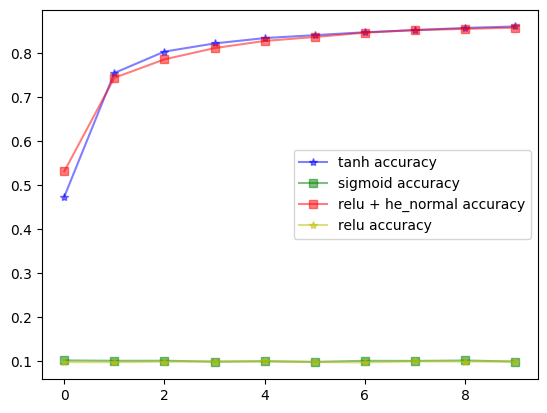

In [61]:
plt.plot(range(10), history_tanh.history['accuracy'], '*-b',label = 'tanh accuracy', alpha = 0.5)
plt.plot(range(10), history_sigmoid.history['accuracy'],'gs-', label = 'sigmoid accuracy', alpha = 0.5)
plt.plot(range(10), history_relu_he.history['accuracy'],'rs-', label = 'relu + he_normal accuracy', alpha = 0.5)
plt.plot(range(10), history_relu.history['accuracy'],'y*-', label = 'relu accuracy', alpha = 0.5)
plt.legend()
plt.show()

**Conclusion**:
In this case using the ReLU with he_normal and Tanh work better than model with sigmoid activation function.


